# Ensemble/Voting Classification in Python with Scikit-Learn

## Import Package

In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

## Read data

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Drop irrelevant features

In [5]:
# Drop the cabin column, as there are too many missing values
# Drop the ticket numbers too, as there are too many categories
# Drop names as they won't really help predict survivors
train_data.drop(labels=['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
test_data.drop(labels=['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [6]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


## Null value

In [8]:
def get_nulls(train, test):
    print("Training Data:")
    print(pd.isnull(train).sum())
    print("Testing Data:")
    print(pd.isnull(test).sum())

get_nulls(train_data, test_data)

Training Data:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
Testing Data:
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [9]:
# Taking the mean/average value would be impacted by the skew
# so we should use the median value to impute missing values
train_data.fillna({"Age": train_data["Age"].median(), "Embarked": "S"}, inplace=True)
test_data.fillna({"Age": test_data["Age"].median(), "Fare": test_data["Fare"].median()}, inplace=True)

get_nulls(train_data, test_data)

Training Data:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Testing Data:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Standardization

In [10]:
# Fit the encoder on the data (Feature: Sex)
encoder_1 = LabelEncoder()
encoder_1.fit(train_data["Sex"])
train_data["Sex"] = encoder_1.transform(train_data["Sex"])
test_data["Sex"] = encoder_1.transform(test_data["Sex"])

# Fit the encoder on the data (Feature: Embarked)
encoder_2 = LabelEncoder()
encoder_2.fit(train_data["Embarked"])
train_data["Embarked"] = encoder_2.transform(train_data["Embarked"])
test_data["Embarked"] = encoder_2.transform(test_data["Embarked"])

# Standardize numerical features (Feature: Age, Fare)
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

## Training Model

In [11]:
# Separate features and target variable
X_features = train_data.drop(labels=['PassengerId', 'Survived'], axis=1)
y_labels = train_data['Survived']

print(X_features.head(5))
print(y_labels.head(5))

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_features, y_labels, test_size=0.1,random_state=12)

   Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       3    1 -0.565736      1      0 -0.502445         2
1       1    0  0.663861      1      0  0.786845         0
2       3    0 -0.258337      0      0 -0.488854         2
3       1    0  0.433312      1      0  0.420730         2
4       3    1  0.433312      0      0 -0.486337         2
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## Simple Averaging Approach

In [12]:
# Simple Averaging Approach
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

LogReg_clf.fit(X_train, y_train)
DTree_clf.fit(X_train, y_train)
SVC_clf.fit(X_train, y_train)

LogReg_pred = LogReg_clf.predict(X_val)
DTree_pred = DTree_clf.predict(X_val)
SVC_pred = SVC_clf.predict(X_val)

# Average the predictions
averaged_preds = (LogReg_pred + DTree_pred + SVC_pred) // 3
acc = accuracy_score(y_val, averaged_preds)
print("Simple Averaging Accuracy: ", acc)

Simple Averaging Accuracy:  0.8


## Bagging Classification Example

In [13]:
# Bagging Classification Example
def bagging_ensemble(model, model_name):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=k_folds)
    print(f"{model_name} Accuracy: {results.mean():.4f}")

# Initialize each model
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

logreg_bagging_model = BaggingClassifier(estimator=LogReg_clf, n_estimators=50, random_state=42)
dtree_bagging_model = BaggingClassifier(estimator=DTree_clf, n_estimators=50, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
extra_tree_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Execute Bagging integration method
bagging_ensemble(logreg_bagging_model, "Logistic Regression")
bagging_ensemble(dtree_bagging_model, "Decision Tree")
bagging_ensemble(rf_model, "Random Forest")
bagging_ensemble(extra_tree_model, "Extra Trees")

Logistic Regression Accuracy: 0.7940
Decision Tree Accuracy: 0.8101
Random Forest Accuracy: 0.8201
Extra Trees Accuracy: 0.7951


## Boosting Classification Example

In [14]:
# Boosting Classification Example
k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
num_estimators = [20, 40, 60, 80, 100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i, random_state=12, algorithm='SAMME')
    results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)
    print(f"Results for {i} estimators: {results.mean()}")

Results for 20 estimators: 0.8064634146341463
Results for 40 estimators: 0.8089024390243903
Results for 60 estimators: 0.8051829268292684
Results for 80 estimators: 0.8039329268292683
Results for 100 estimators: 0.8051829268292684


Results for 25 estimators: 0.8076829268292682
Results for 30 estimators: 0.8076829268292682
Results for 40 estimators: 0.8089024390243903
Results for 45 estimators: 0.8076829268292682
Results for 50 estimators: 0.8064329268292683
Results for 100 estimators: 0.8051829268292684
Results for 500 estimators: 0.8089329268292683
Results for 1000 estimators: 0.8176524390243902
Results for 2000 estimators: 0.8126524390243903
Results for 5000 estimators: 0.8101829268292683
Results for 10000 estimators: 0.8051829268292682


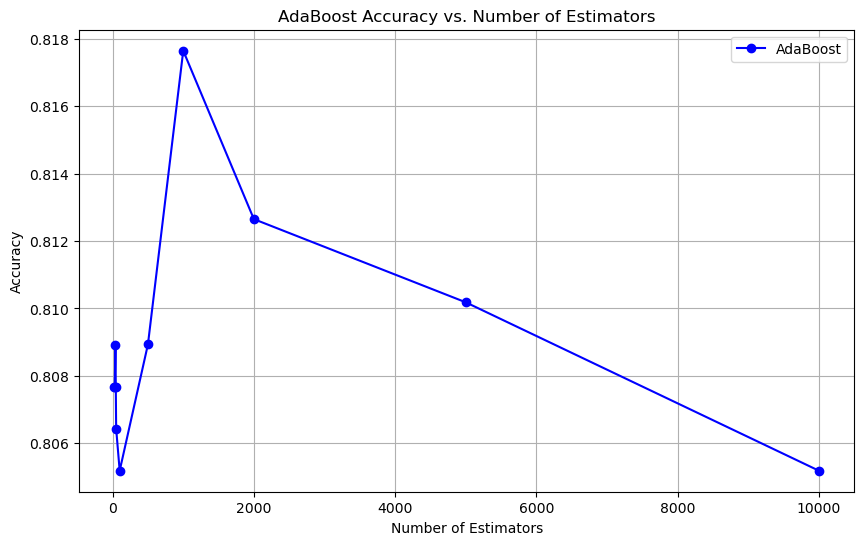

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, KFold

# Boosting Classification Example
k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
num_estimators = [25, 30, 40, 45, 50, 100, 500, 1000, 2000, 5000, 10000]

results_mean = []

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i, random_state=12, algorithm='SAMME')
    results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)
    results_mean.append(results.mean())
    print(f"Results for {i} estimators: {results.mean()}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, results_mean, marker='o', linestyle='-', color='b', label='AdaBoost')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Voting\Stacking Classification Example

In [16]:
# Voting/Stacking Classification Example
# Initialize each model
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_val)

acc = accuracy_score(y_val, preds)
l_loss = log_loss(y_val, preds)
f1 = f1_score(y_val, preds)

print("Voting Accuracy is: ", acc)
print("Log Loss is: ", l_loss)
print("F1 Score is: ", f1)

Voting Accuracy is:  0.8333333333333334
Log Loss is:  6.0072755648528595
F1 Score is:  0.7761194029850746


## Kaggle

https://www.kaggle.com/competitions/titanic/data

使用voting_clf的結果(Voting Accuracy is 0.833)

![kaggle_submission_score_240807](./image/kaggle_submission_score_240807.png)

In [17]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
715,3,1,-0.796286,0,0,-0.494391,2
319,1,0,0.817561,1,1,2.059694,0
829,1,0,2.508257,0,0,0.962353,2
79,3,0,0.049062,0,0,-0.397241,2
484,1,1,-0.335187,1,0,1.185430,0
...,...,...,...,...,...,...,...
241,3,0,-0.104637,1,0,-0.336334,1
253,3,1,0.049062,1,0,-0.324253,2
390,1,1,0.510161,1,2,1.767741,2
667,3,1,-0.104637,0,0,-0.491874,2


In [18]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.394887,0,0,-0.490783,1
1,893,3,0,1.355510,1,0,-0.507479,2
2,894,2,1,2.508257,0,0,-0.453367,1
3,895,3,1,-0.181487,0,0,-0.474005,2
4,896,3,0,-0.565736,1,1,-0.401017,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,-0.181487,0,0,-0.486337,2
414,1306,1,0,0.740711,0,0,1.544246,0
415,1307,3,1,0.702286,0,0,-0.502445,2
416,1308,3,1,-0.181487,0,0,-0.486337,2


In [19]:
test_pred = test_data.drop(labels=['PassengerId'], axis=1)
test_pred.shape

(418, 7)

In [20]:
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test_data['PassengerId']
submission_df['Survived'] = voting_clf.predict(test_pred)

print(submission_df)
submission_df.to_csv('./data/submission.csv', header=True, index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
